# Customizing Matplotlib: Configurations and Stylesheets

While many of the topics covered in previous chapters involve adjusting the style of plot elements one by one, Matplotlib also offers mechanisms to adjust the overall style of a chart all at once. In this chapter we'll walk through some of Matplotlib's runtime configuration (*rc*) options, and take a look at the *stylesheets* feature, which contains some nice sets of default configurations.

## Plot Customization by Hand

Throughout this part of the book, you've seen how it is possible to tweak individual plot settings to end up with something that looks a little nicer than the default.
It's also possible to do these customizations for each individual plot.
For example, here is a fairly drab default histogram, shown in the following figure:

In [17]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

%matplotlib inline

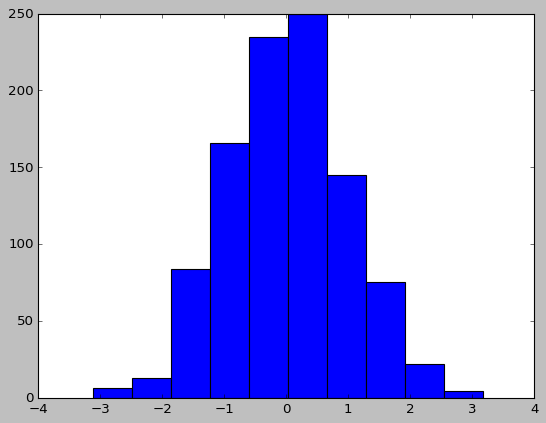

In [18]:
x = np.random.randn(1000)
plt.hist(x);

We can adjust this by hand to make it a much more visually pleasing plot, as you can see in the following figure:

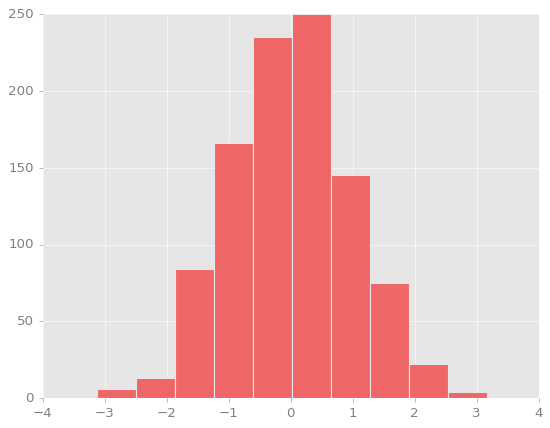

In [19]:
# use a gray background
fig = plt.figure(facecolor='white')
ax = plt.axes(facecolor='#E6E6E6')
ax.set_axisbelow(True)

# draw solid white gridlines
plt.grid(color='w', linestyle='solid')

# hide axis spines
for spine in ax.spines.values():
    spine.set_visible(False)
    
# hide top and right ticks
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# lighten ticks and labels
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')
    
# control face and edge color of histogram
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666');

This looks better, and you may recognize the look as inspired by that of the R language's `ggplot` visualization package.
But this took a whole lot of effort!
We definitely do not want to have to do all that tweaking each time we create a plot.
Fortunately, there is a way to adjust these defaults once in a way that will work for all plots.

## Changing the Defaults: rcParams

Each time Matplotlib loads, it defines a runtime configuration containing the default styles for every plot element you create.
This configuration can be adjusted at any time using the `plt.rc` convenience routine.
Let's see how we can modify the rc parameters so that our default plot will look similar to what we did before.

We can use the `plt.rc` function to change some of these settings:

In [20]:
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='white')
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

With these settings defined, we can now create a plot and see our settings in action (see the following figure):

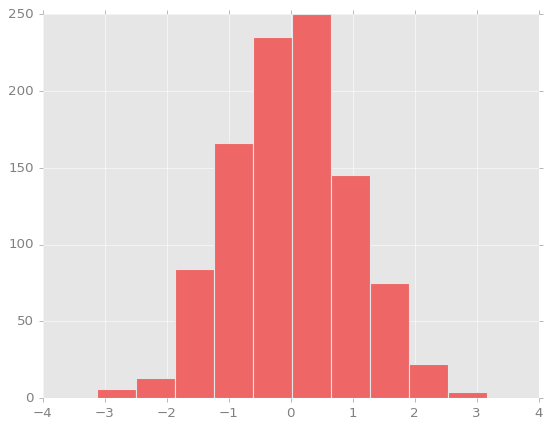

In [21]:
plt.hist(x);

Let's see what simple line plots look like with these rc parameters (see the following figure):

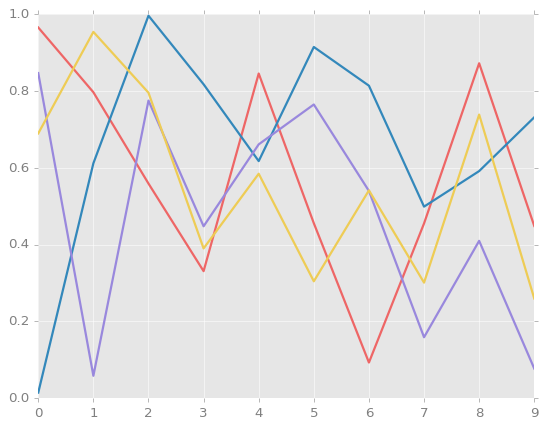

In [22]:
for i in range(4):
    plt.plot(np.random.rand(10))

For charts viewed onscreen rather than printed, I find this much more aesthetically pleasing than the default styling.
If you disagree with my aesthetic sense, the good news is that you can adjust the rc parameters to suit your own tastes!
Optionally, these settings can be saved in a *.matplotlibrc* file, which you can read about in the [Matplotlib documentation](https://matplotlib.org/stable/tutorials/introductory/customizing.html).

## Stylesheets

A newer mechanism for adjusting overall chart styles is via Matplotlib's `style` module, which includes a number of default stylesheets, as well as the ability to create and package your own styles. These stylesheets are formatted similarly to the *.matplotlibrc* files mentioned earlier, but must be named with a *.mplstyle* extension.

Even if you don't go as far as creating your own style, you may find what you're looking for in the built-in stylesheets.
`plt.style.available` contains a list of the available styles—here I'll list only the first five for brevity:

In [23]:
plt.style.available[:5]

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh']

The standard way to switch to a stylesheet is to call `style.use`:

``` python
plt.style.use('stylename')
```

But keep in mind that this will change the style for the rest of the Python session!
Alternatively, you can use the style context manager, which sets a style temporarily:

``` python
with plt.style.context('stylename'):
    make_a_plot()
```


To demonstrate these styles, let's create a function that will make two basic types of plot:

In [24]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

We'll use this to explore how these plots look using the various built-in styles.

### Default Style

Matplotlib's `default` style was updated in the version 2.0 release; let's look at this first (see the following figure):

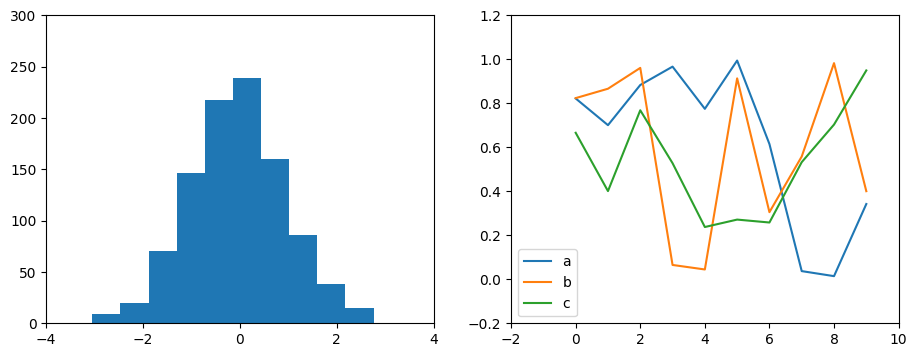

In [25]:
with plt.style.context('default'):
    hist_and_lines()

### FiveThiryEight Style

The `fivethirtyeight` style mimics the graphics found on the popular [FiveThirtyEight website](https://fivethirtyeight.com).
As you can see in the following figure, it is typified by bold colors, thick lines, and transparent axes:

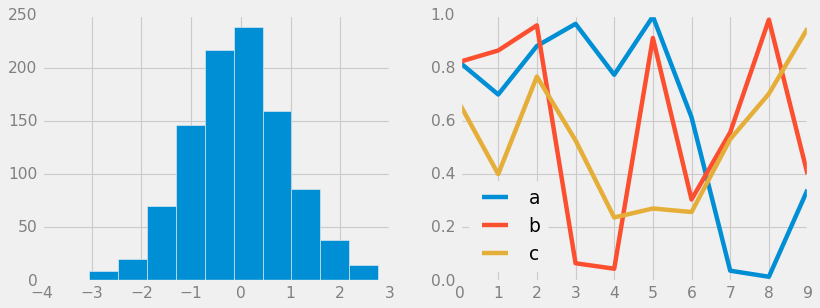

In [26]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

### ggplot Style

The `ggplot` package in the R language is a popular visualization tool among data scientists.
Matplotlib's `ggplot` style mimics the default styles from that package (see the following figure):

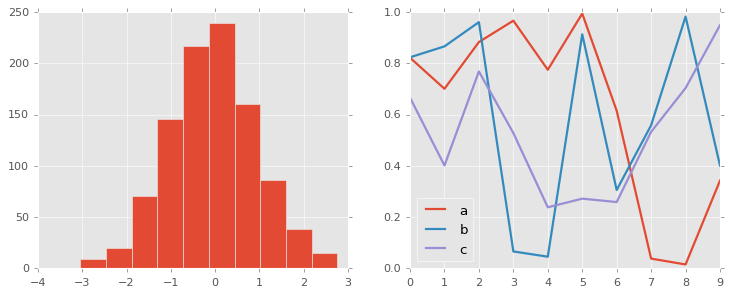

In [27]:
with plt.style.context('ggplot'):
    hist_and_lines()

### Bayesian Methods for Hackers Style

There is a neat short online book called [*Probabilistic Programming and Bayesian Methods for Hackers*](http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/) by Cameron Davidson-Pilon that features figures created with Matplotlib, and uses a nice set of rc parameters to create a consistent and visually appealing style throughout the book.
This style is reproduced in the ``bmh`` stylesheet (see the following figure):

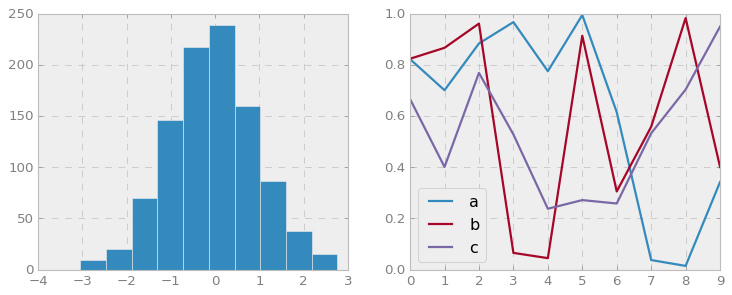

In [28]:
with plt.style.context('bmh'):
    hist_and_lines()

### Dark Background Style

For figures used within presentations, it is often useful to have a dark rather than light background.
The `dark_background` style provides this (see the following figure):

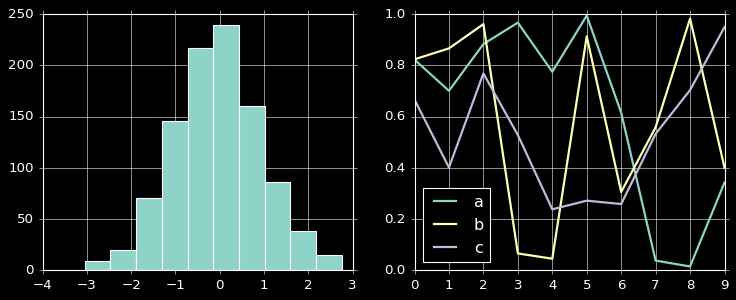

In [29]:
with plt.style.context('dark_background'):
    hist_and_lines()

### Grayscale Style

Sometimes you might find yourself preparing figures for a print publication that does not accept color figures.
For this, the `grayscale` style (see the following figure) can be useful:

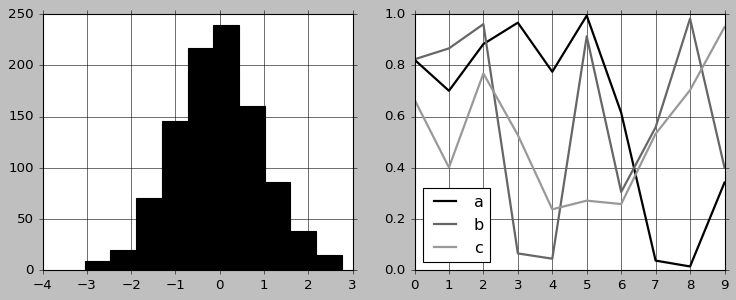

In [30]:
with plt.style.context('grayscale'):
    hist_and_lines()

### Seaborn Style

Matplotlib also has several stylesheets inspired by the Seaborn library (discussed more fully in [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)).
I've found these settings to be very nice, and tend to use them as defaults in my own data exploration (see the following figure):

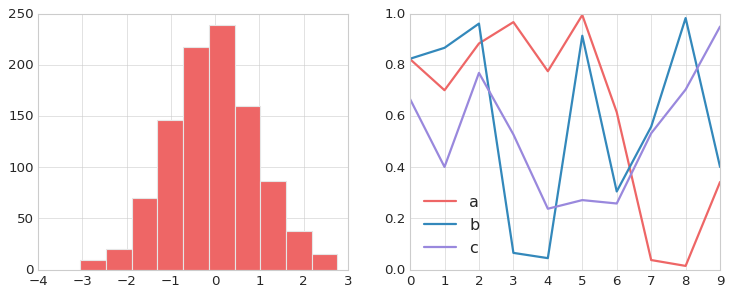

In [31]:
with plt.style.context('seaborn-v0_8-whitegrid'):
    hist_and_lines()

Take some time to explore the built-in options and find one that appeals to you!
Throughout this book, I will generally use one or more of these style conventions when creating plots.